# Visual Question Answering with BLIP-1 (HuggingFace Transformers)
**Author**: Ravi Lahare

This notebook demonstrates how to perform Visual Question Answering (VQA) using the **BLIP-1** model from HuggingFace Transformers.

We use `Salesforce/blip-vqa-base` to answer natural language questions about an input image. The model processes the image and a question, and generates a textual answer. In this example, we:
- Load and display an image
- Ask multiple questions about the image
- Use the BLIP-1 model to generate and print answers


## Motivation

Visual Question Answering (VQA) is a fascinating multimodal task that combines computer vision and natural language understanding. I chose to explore **BLIP-1** because it offers a powerful yet accessible model for vision-language tasks, enabling image-based question answering with impressive accuracy. Understanding how such systems work is both enriching and highly practical for a wide range of real-world AI applications such as accessibility, education, and intelligent assistants.


## Context & Relevance in Multimodal Learning

BLIP-1 is an important milestone in the development of vision-language models. It leverages pretrained vision encoders (like Vision Transformers) and lightweight language decoders to enable tasks like image captioning and visual question answering (VQA). BLIP-1 aligns well with key concepts in multimodal learning, such as cross-modal attention, vision-language alignment, and encoder-decoder architectures. VQA, in particular, showcases how models can reason over both visual and textual inputs to produce intelligent, context-aware responses.


## Install and Import Required Libraries

In [1]:
from transformers import BlipProcessor, BlipForQuestionAnswering
from PIL import Image
import torch

# Load model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

c:\Users\ravil\anaconda3\envs\vqa\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


BlipForQuestionAnswering(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-05, e

## Load Image and Ask a Questions

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ravil\AppData\Local\Temp\ipykernel_12404\2697084279.py:2: SyntaxWarning: invalid escape sequence '\c'
  image_path = "images\cat.jpg"  # Replace with your image path


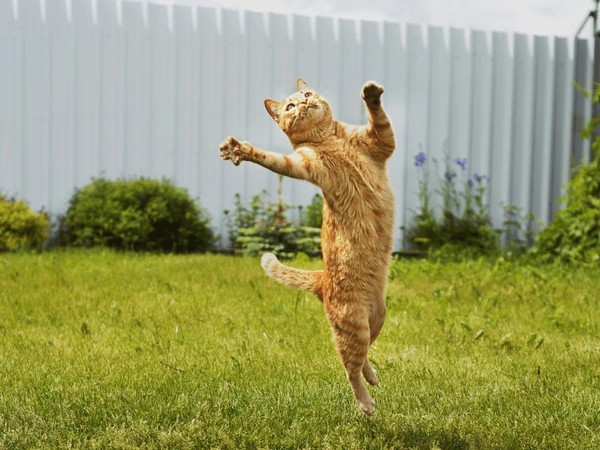

Q: What is the cat doing?
A: jumping

Q: What color is the wall?
A: white

Q: Is the cat sitting or standing?
A: standing



In [ ]:
# Load image
image_path = "images\cat.jpg"  # Replace with your image path
image = Image.open(image_path).convert('RGB')
display(image)

# set questions
questions = [
    "What is the cat doing?",
    "What color is the wall?",
    "Is the cat sitting or standing?"
]

# get answers 
for q in questions:
    inputs = processor(image, q, return_tensors="pt").to(device)
    outputs = model.generate(**inputs)
    answer = processor.decode(outputs[0], skip_special_tokens=True)
    print(f"Q: {q}\nA: {answer}\n")

## References
- [BLIP VQA (Salesforce) on HuggingFace](https://huggingface.co/Salesforce/blip-vqa-base)
- [HuggingFace Transformers Documentation](https://huggingface.co/docs/transformers/index)